In [15]:
import pandas as pd
import numpy as np

import matplotlib as mpl 

## agg backend is used to create plot as a .png file
mpl.use('agg')

import matplotlib.pyplot as plt 




In [416]:

bert_distance_stats.to_csv("ga_attack_results/ga_results_DISTANCE_BERT_STATS.csv", index = False)

250

In [417]:
ga_stats_results_BERT = "ga_results_BERT_STATS.csv"
ga_stats_results_DISTANCE = "ga_results_DISTANCE_STATS.csv"
ga_stats_results_DISTANCE_BERT = "ga_results_DISTANCE_BERT_STATS.csv"

normalised_dataset_ = "imdb_dataset/normalized_dataset.csv"
imdb_dataset_ = "imdb_dataset/raw_data.csv"


bert_stats = pd.read_csv('ga_attack_results/'+ga_stats_results_BERT)
distance_stats = pd.read_csv('ga_attack_results/'+ga_stats_results_DISTANCE)
bert_distance_stats = pd.read_csv('ga_attack_results/'+ga_stats_results_DISTANCE_BERT)

normalized_dataset = pd.read_csv(normalised_dataset_)
raw_dataset = pd.read_csv(imdb_dataset_)

dataset_size = len(distance_stats)

In [130]:
bert_stats.head()

,sentiment,text,probs,ga_sentiment,ga_text,ga_probs,ga_num_changes,ga_lev_ratio,ga_flipped_sentiment,ga_percent_change,ga_generations,ga_time_taken
0,0,well i must say this is probably the worst fil...,0.025771,1,well i must say this is probably the best film...,0.812936,5,0.966937,Y,0.03,1,42
1,1,if christopher nolan had made memento before f...,0.769358,0,if christopher nolan had made memento before f...,0.398513,8,0.968591,Y,0.03,2,87
2,1,i'm not saying anything new when i say that ra...,0.807952,0,i'm not saying anything new when i say that ra...,0.484280,5,0.977343,Y,0.03,1,43
3,0,i have been watching lost with my family since...,0.476023,1,i have been watching lost with my family since...,0.672474,4,0.979098,Y,0.01,1,44
4,1,caught this flick as one of a fivefor deal fro...,0.942861,0,caught this flick as one of a fivefor deal fro...,0.456993,8,0.959369,Y,0.05,2,84


In [131]:
distance_stats.head()

,sentiment,text,probs,ga_sentiment,ga_text,ga_probs,ga_num_changes,ga_lev_ratio,ga_flipped_sentiment,ga_percent_change,ga_generations,ga_time_taken
0,0,well i must say this is probably the worst fil...,0.025771,1,well i must say this is arguably the meanest f...,0.762060,13,0.934823,Y,0.08,3,97
1,1,if christopher nolan had made memento before f...,0.769358,0,if christopher nolan had made memento before f...,0.448427,5,0.974665,Y,0.02,1,33
2,1,i'm not saying anything new when i say that ra...,0.807952,0,i'm not saying anything new when i tell that r...,0.392656,7,0.970754,Y,0.04,2,59
3,0,i have been watching lost with my family since...,0.476023,1,i have been watching lost with my family since...,0.799918,2,0.978627,Y,0.01,1,32
4,1,caught this flick as one of a fivefor deal fro...,0.942861,0,caught this flick as somebody of a fivefor dea...,0.463923,9,0.955224,Y,0.06,2,64


# box plots for time taken 

In [125]:
bert_distance_stats.head()

,sentiment,text,probs,ga_sentiment,ga_text,ga_probs,ga_num_changes,ga_lev_ratio,ga_flipped_sentiment,ga_percent_change,ga_generations,ga_time_taken
0,0,well i must say this is probably the worst fil...,0.025771,1,well i must say this is probably the meanest f...,0.768538,20,0.895522,Y,0.13,5,264
1,1,if christopher nolan had made memento before f...,0.769358,0,if christopher nolan had made memento before f...,0.395876,10,0.966031,Y,0.03,2,107
2,1,i'm not saying anything new when i say that ra...,0.807952,0,i'm not saying somethings newer when i say tha...,0.426562,10,0.958418,Y,0.05,2,106
3,0,i have been watching lost with my family since...,0.476023,1,i have been watching lost with my family since...,0.637239,5,0.978884,Y,0.01,1,53
4,1,caught this flick as one of a fivefor deal fro...,0.942861,0,caught this flick as anyone of a fivefor addre...,0.294813,29,0.836257,Y,0.19,5,256


# graphs

In [169]:
# import matplotlib.style as style 
# style.available

In [391]:
def time_boxplot(data_method_a, data_method_b, data_method_c, file_name):
    
    data = [data_method_a,data_method_b,data_method_c] 

    labels = ['Method A\nStandard Deviation\n' + str(np.std(distance_time)),'Method B\nStandard Deviation\n' + str(np.std(bert_time)),'Method C\nStandard Deviation\n' + str(np.std(bert_distance_time))]

    plt.style.use('seaborn')
    
    # Create a figure instance
    fig = plt.figure(1, figsize=(15, 12))

    # Create an axes instance
    axs = fig.add_subplot(111)

    axs.set_xticklabels(labels)

    box_plot = axs.boxplot(data, showmeans=True)

    h, l = axs.get_legend_handles_labels()
    h.append(box_plot.get('means')[0])
    h.append(box_plot.get('medians')[0])
    h.append(box_plot.get('fliers')[0])


    l = ['Mean', 'Median', 'Outliers']
    plt.rcParams["legend.loc"] = 'lower right'
    plt.legend(h, l)

    
    plt.xlabel("*** Algorithm (A, B or C) ***")
    plt.ylabel("*** Time (seconds) ***")

    fig.savefig(file_name, bbox_inches='tight',dpi=300)
    plt.show()
    
    return
  

def generate_scatterplot(x_axis, y_axis, file_name, graph_title):
    
    fig = plt.figure(1, figsize=(15, 12))
    plt.style.use('seaborn')
    plt.xticks(range(len(x_axis)))
    plt.title(graph_title, fontsize=14)

    plt.xlabel("Generation")
    plt.ylabel("Num of Words Changed")
    
    plt.scatter(x_axis, y_axis,  alpha=0.3)
    

    fig.savefig(file_name, bbox_inches='tight',dpi=300)
    
    plt.show()

    return


def words_generations_barchart(words_changed,graph_title, file_name):
    
    data = words_changed.copy()
    max_value = (max(data) + 1)
    fig = plt.figure(1, figsize=(15, 20))
    plt.style.use('seaborn')
    plt.yticks(range(max_value))
    plt.xlabel('Data Item')
    plt.ylabel('Number of Words Changed')
    plt.title(graph_title, fontsize=14)
    plt.bar(range(len(data)), data) 
    
    fig.savefig(file_name, bbox_inches='tight',dpi=300)
    
    plt.show()
    
    return


In [244]:
def average_stats_bar_chart(data, labels, x_axis_name, y_axis_name, chart_title, file_name):

    fig = plt.figure(1, figsize=(15, 12))
    plt.xticks(range(len(data)), labels)
    plt.xlabel(x_axis_name)
    plt.ylabel(y_axis_name)
    plt.title(chart_title)
    plt.bar(range(len(data)), data) 
    fig.savefig(file_name, bbox_inches='tight',dpi=300)
    
    plt.show()
    
    return

In [230]:
def set_percentage_modified(data_sample):

    word_total_count = 0
    percent_modified_total = 0.0
    for i in range(len(data_sample)):
        review_before = data_sample.at[i,'text'].split()
        review_after = data_sample.at[i,'ga_text'].split()
        word_count = 0
        for j in range(len(review_before)):
            if review_before[j] != review_after[j]:
                word_count += 1
        data_sample.at[i, 'ga_num_changes'] = word_count
        percent_modified_total += (word_count / len(review_before))
        data_sample.at[i, 'ga_percent_change'] = round(word_count / len(review_before), 2)
        word_total_count += word_count
            


    print("Avg. num of words changed changes made: ", (int)(word_total_count / len(data_sample)))
    print("Avg. percentage modified: ", (round(percent_modified_total / len(data_sample), 2) * 100),"%")
    return

In [251]:
def matching_indexes(data_sample,normalized_dataset):
    '''match up index values from data_sample to raw data file'''
    index_values_rawdata = []
    for i in range(len(data_sample)):
        for j in range(len(normalized_dataset)): 
            if normalized_dataset.at[j,'text'] == data_sample.at[i, 'text']:
               # print(raw_data_sample.at[j,'text'],"\n",data_sample.at[i, 'text'],"\n\n")
                index_values_rawdata.append(j)
                break
    return index_values_rawdata

In [344]:
def print_data_item(raw_dataset,normalized_dataset, method_dataset, indx, item):
    print(raw_dataset.at[item,'text'])
    print("\n")
    print(normalized_dataset.at[item,'text'])
    print("\n")
    print(method_dataset.at[indx,'ga_text'])
    return

def words_swapped(normalized_dataset, method_dataset, indx, item):
    raw_split_words = normalized_dataset.at[item,'text'].split()
    data_sample_split_words = method_dataset.at[indx,'ga_text'].split()

    len_range = len(data_sample_split_words)
    
    number_of_words_swapped = 0
    for i in range(len_range):
        if raw_split_words[i] != data_sample_split_words[i]:
            number_of_words_swapped += 1
            print("BEFORE: ", raw_split_words[i], " AFTER: ",data_sample_split_words[i])
    print("\nTotal number of words swapped: ",number_of_words_swapped)
    if method_dataset.at[indx,'sentiment'] != method_dataset.at[indx,'ga_sentiment']:
        print("Sentiment was changed for this data item")
        print("Probability Before: ", method_dataset.at[indx,'probs'])
        print("Probability After: ", method_dataset.at[indx,'ga_probs'])
    else:
        print("Sentiment was NOT changed for this data item")
        print("Probability Before: ", method_dataset.at[indx,'probs'])
        print("Probability After: ", method_dataset.at[indx,'ga_probs'])
    return

def sentiment_change_percentage(data_sample):

    flipped_count = 0
    failed_flipped_count = 0
    for i in range(len(data_sample)):
        if  data_sample.at[i,'sentiment'] != data_sample.at[i,'ga_sentiment'] and (data_sample.at[i,'ga_percent_change'] <= 0.2):
            flipped_count += 1
        else:
            failed_flipped_count += 1

        
    print("Percentage of reviews where sentiment was changed after attack:", round(flipped_count/len(data_sample) * 100, 2),"%", "changed sentiment. i.e.", flipped_count, " out of ",len(data_sample))
    print("Percentage of reviews failed to change sentiment: ", round(failed_flipped_count/len(data_sample) * 100, 2), "%","did not change, i.e.", failed_flipped_count, " out of ",len(data_sample))
    print("\n")
    return

# display boxplot for each method for time taken to run

<ipython-input-391-5202c7aafa27>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels)


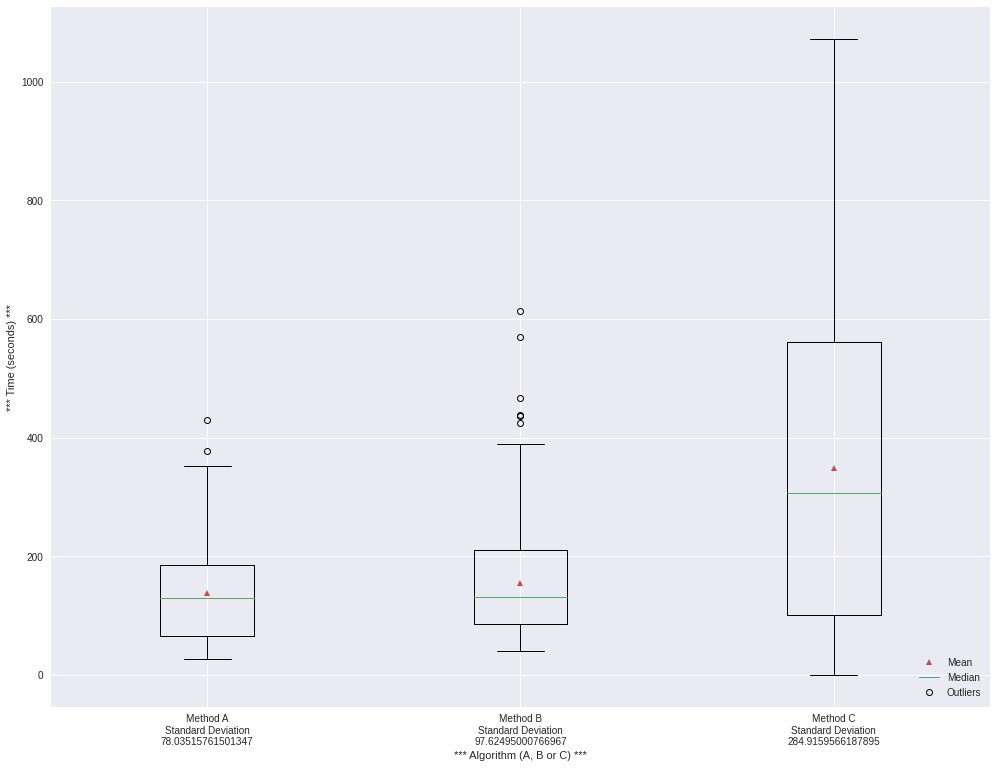

In [418]:
# box plot data
distance_time_box = distance_stats['ga_time_taken'] # method A
bert_time_box = bert_stats['ga_time_taken'] # method B
bert_distance_time_box = bert_distance_stats['ga_time_taken'] # method C

time_box_filename = 'ga_attack_results/box-plot-time.png'

# draw and save box plot
time_boxplot(distance_time_box,bert_time_box,bert_distance_time_box, time_box_filename)


<ipython-input-391-5202c7aafa27>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(labels)


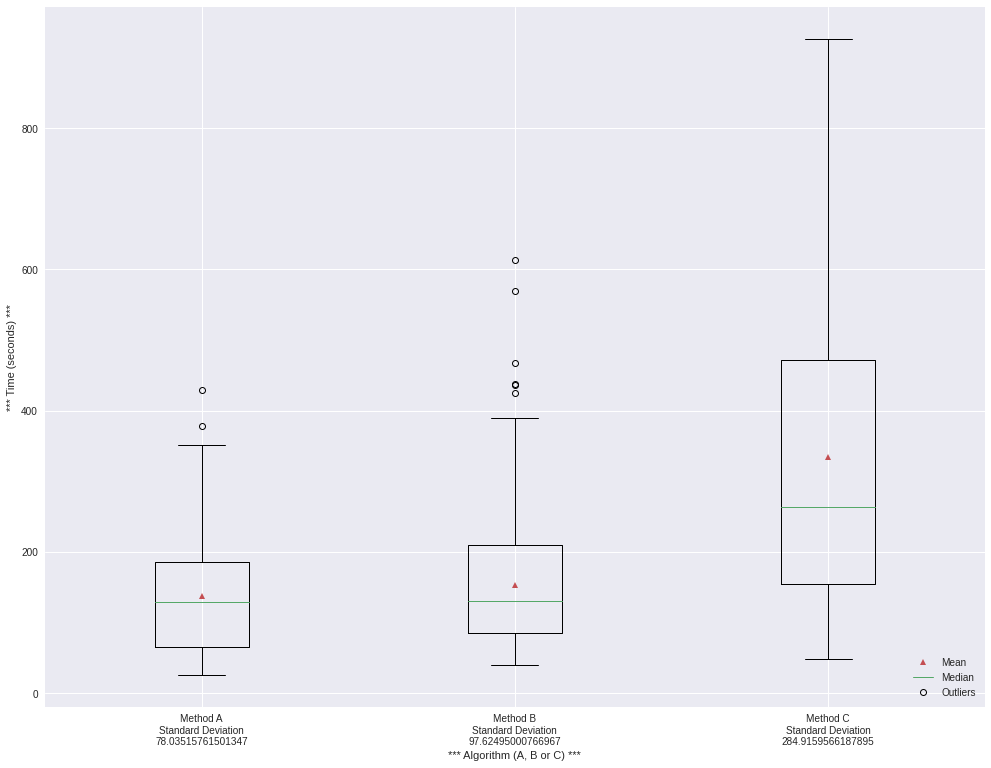

In [428]:
# box plot data for only successfully flipped sentiments
# distance_time_box = distance_stats['ga_time_taken'] # method A
distance_time_box = []
for i in range(dataset_size):
    if (distance_stats.at[i,'sentiment'] != distance_stats.at[i,'ga_sentiment']) and distance_stats.at[i,'ga_percent_change'] < 0.2:
        distance_time_box.append(distance_stats.at[i,'ga_time_taken'])


#bert_time_box = bert_stats['ga_time_taken'] # method B
bert_time_box = []
for i in range(dataset_size):
    if (bert_stats.at[i,'sentiment'] != bert_stats.at[i,'ga_sentiment']) and bert_stats.at[i,'ga_percent_change'] < 0.2:
        bert_time_box.append(bert_stats.at[i,'ga_time_taken'])



#bert_distance_time_box = bert_distance_stats['ga_time_taken'] # method C
bert_distance_time_box = []
for i in range(dataset_size):
    if (bert_distance_stats.at[i,'sentiment'] != bert_distance_stats.at[i,'ga_sentiment']) and bert_distance_stats.at[i,'ga_percent_change'] < 0.2:
        bert_distance_time_box.append(bert_distance_stats.at[i,'ga_time_taken'])


time_box_filename = 'ga_attack_results/box-plot-time-successful.png'

# draw and save box plot
time_boxplot(distance_time,bert_time_box,bert_distance_time_box, time_box_filename)

In [451]:
for i in range(dataset_size):
    if distance_stats.at[i,'ga_time_taken'] == 26:
        #print(distance_stats.at[i,'text'],"\n" )
        print(len(distance_stats.at[i,'text'].split()))


# print(min(distance_time_box), max(distance_time_box))
# print(min(bert_time_box),max(bert_time_box))
# print(min(bert_distance_time_box), max(bert_distance_time_box))

40
143


In [449]:
for i in range(dataset_size):
    if bert_stats.at[i,'ga_time_taken'] == 40:
        #print(bert_stats.at[i,'text'],"\n" )
        print(len(bert_stats.at[i,'text'].split()))

156


In [452]:
for i in range(dataset_size):
    if bert_distance_stats.at[i,'ga_time_taken'] == 49:
        #print(bert_distance_stats.at[i,'text'],"\n" )
        print(len(bert_distance_stats.at[i,'text'].split()))

562
220


# scatter plot for Method A

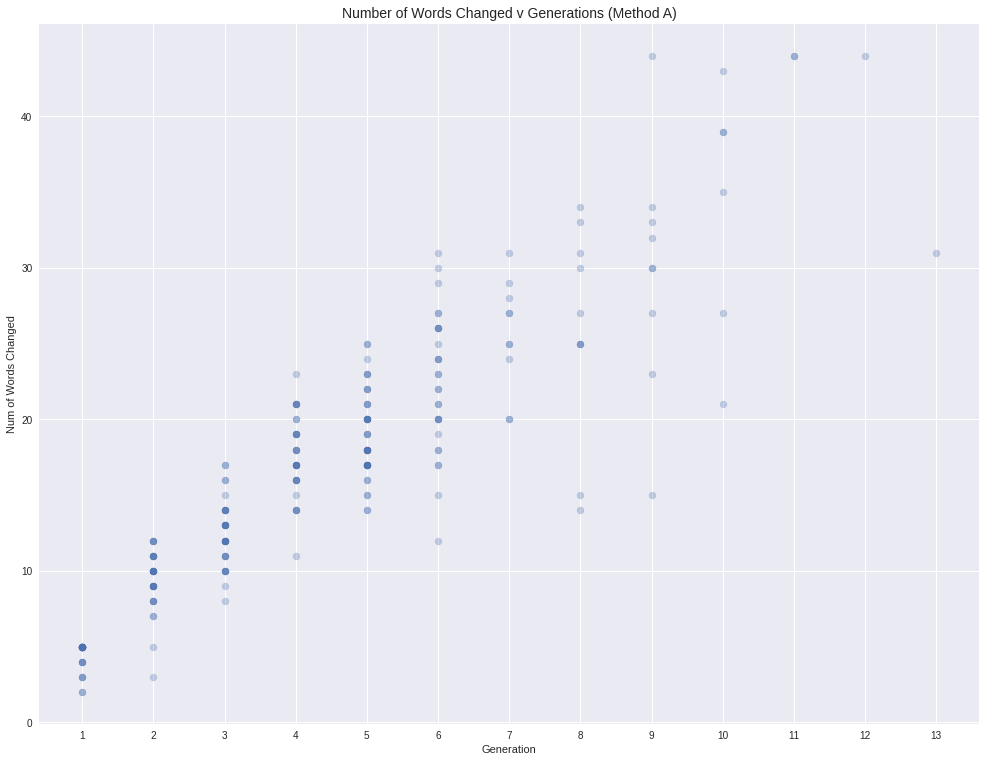

In [194]:

distance_time_box_scatter_gen = distance_stats['ga_generations']
distance_time_box_scatter = distance_stats['ga_num_changes']
scatter_plot_filename_a = 'ga_attack_results/scatter-plot-method_a.png'
graph_title_a = "Number of Words Changed v Generations (Method A)"
generate_scatterplot(distance_time_box_scatter_gen,distance_time_box_scatter,scatter_plot_filename_a, graph_title_a)


# scatter plot for Method B

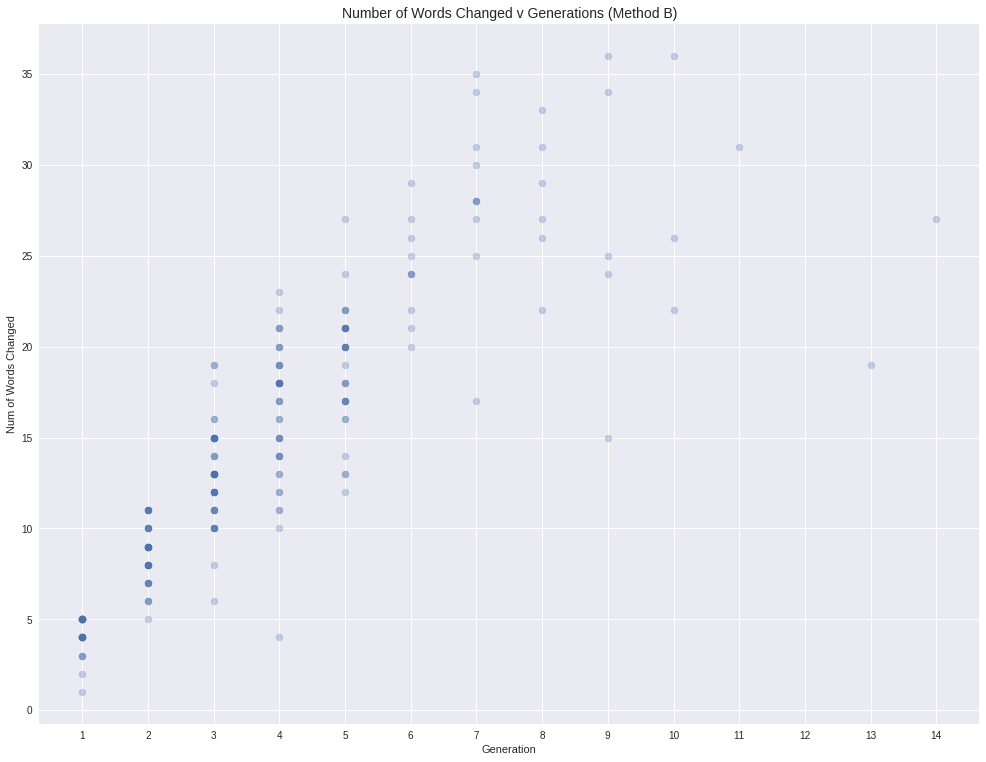

In [193]:

bert_time_box_scatter_gen = bert_stats['ga_generations']
bert_time_box_scatter = bert_stats['ga_num_changes']
scatter_plot_filename_b = 'ga_attack_results/scatter-plot-method_b.png'
graph_title_b = "Number of Words Changed v Generations (Method B)"
generate_scatterplot(bert_time_box_scatter_gen,bert_time_box_scatter,scatter_plot_filename_b, graph_title_b)


# scatter plot for Method C

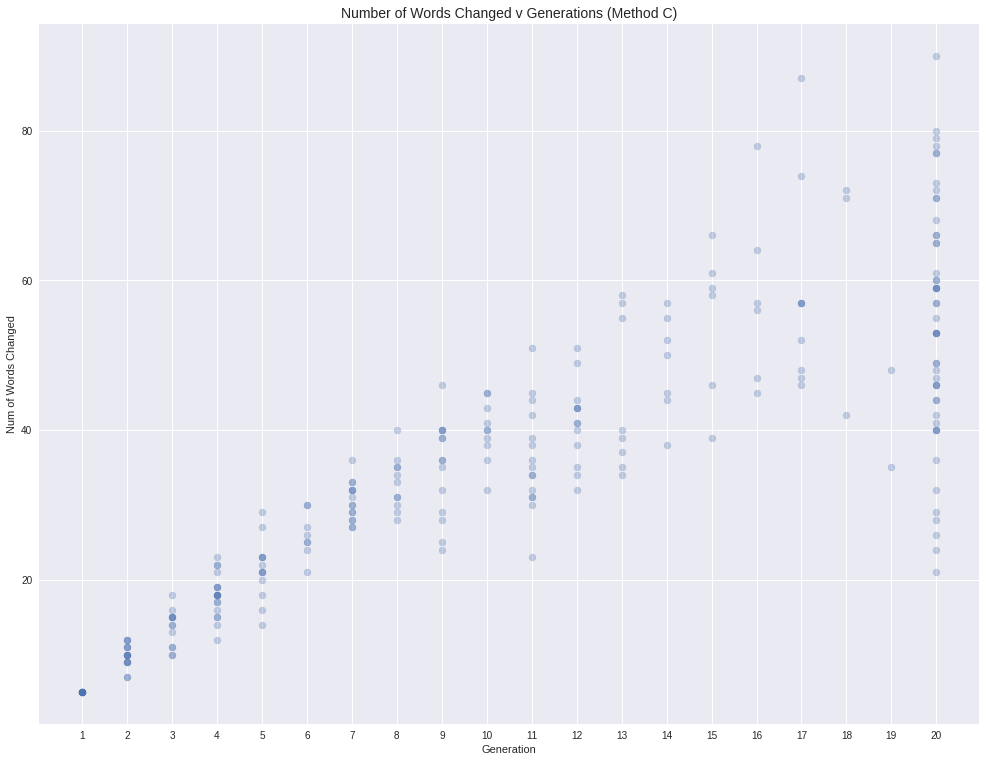

In [192]:
# MAXIMUM_ITERATIONS = 20 
# bert_distance_gen = bert_distance_stats['ga_generations']
# bert_distance_time_num_changed = bert_distance_stats['ga_num_changes']

# for i in range(len(bert_distance_time_box_scatter_gen)):
#     if bert_distance_time_num_changed[i] > 0 and bert_distance_gen[i] == 0:
#         bert_distance_stats.at[i,'ga_generations'] = MAXIMUM_ITERATIONS



bert_distance_time_box_scatter_gen = bert_distance_stats['ga_generations']
bert_distance_time_box_scatter = bert_distance_stats['ga_num_changes']
scatter_plot_filename_c = 'ga_attack_results/scatter-plot-method_c.png'
grapht_title_c = "Number of Words Changed v Generations (Method C)"

generate_scatterplot(bert_distance_time_box_scatter_gen,bert_distance_time_box_scatter,scatter_plot_filename_c, grapht_title_c)
# need to clean data results - where generation is equal to zero - should be 20

# words changed v data item bar chart - Method A

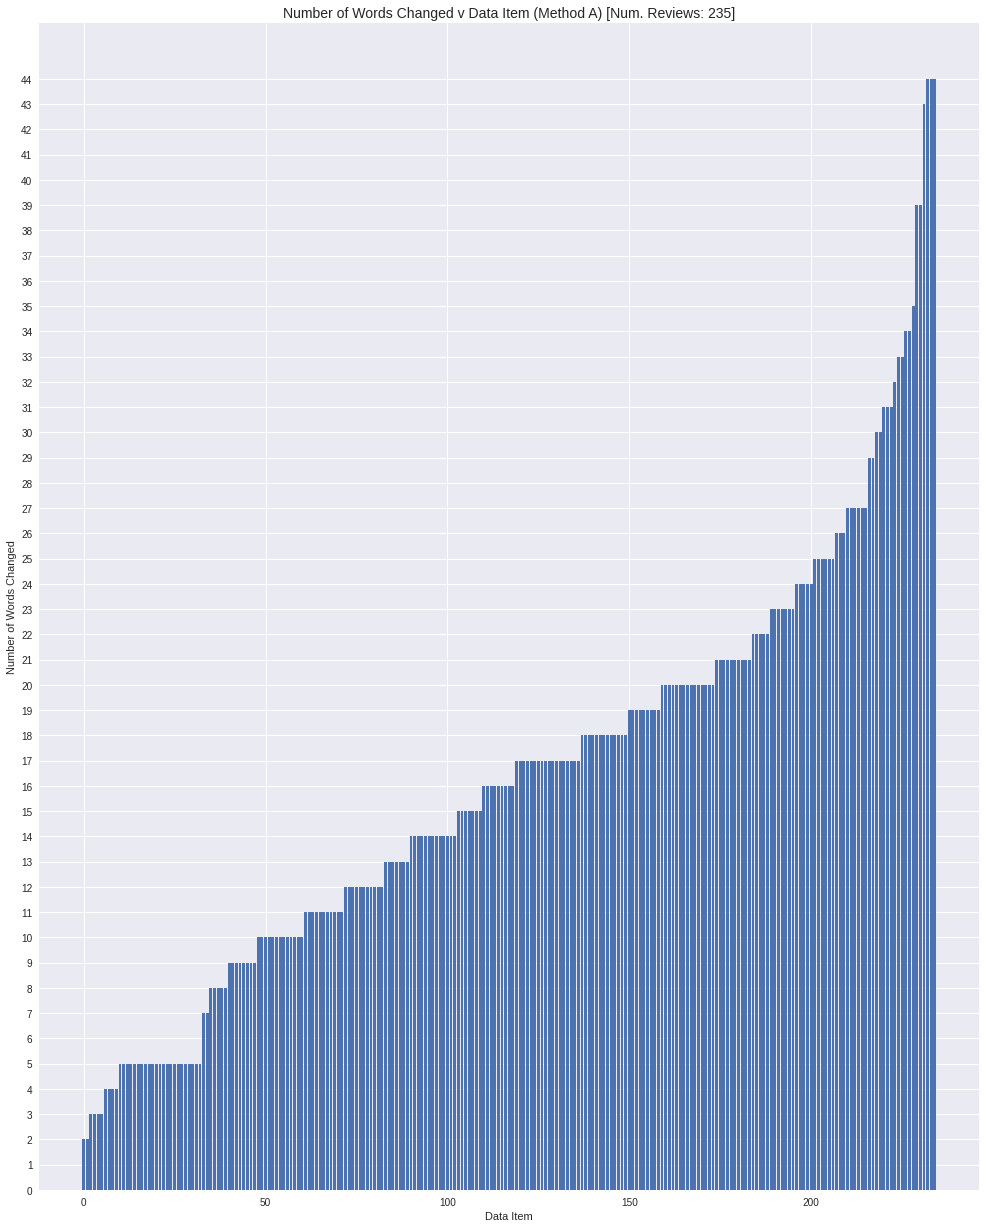

In [414]:

distance_num_words_changed = []

for i in range(dataset_size):
    if (distance_stats.at[i,'sentiment'] != distance_stats.at[i,'ga_sentiment']) and distance_stats.at[i,'ga_percent_change'] < 0.2:
        distance_num_words_changed.append(distance_stats.at[i,'ga_num_changes'])

distance_num_words_changed.sort()


bar_chart_filename_a = 'ga_attack_results/bar_chart_method_a.png'
graph_title_a = "Number of Words Changed v Data Item (Method A) [Num. Reviews: "+str(len(distance_num_words_changed))+"]"

words_generations_barchart(distance_num_words_changed,  graph_title_a, bar_chart_filename_a)

# words changed v data item bar chart - Method B

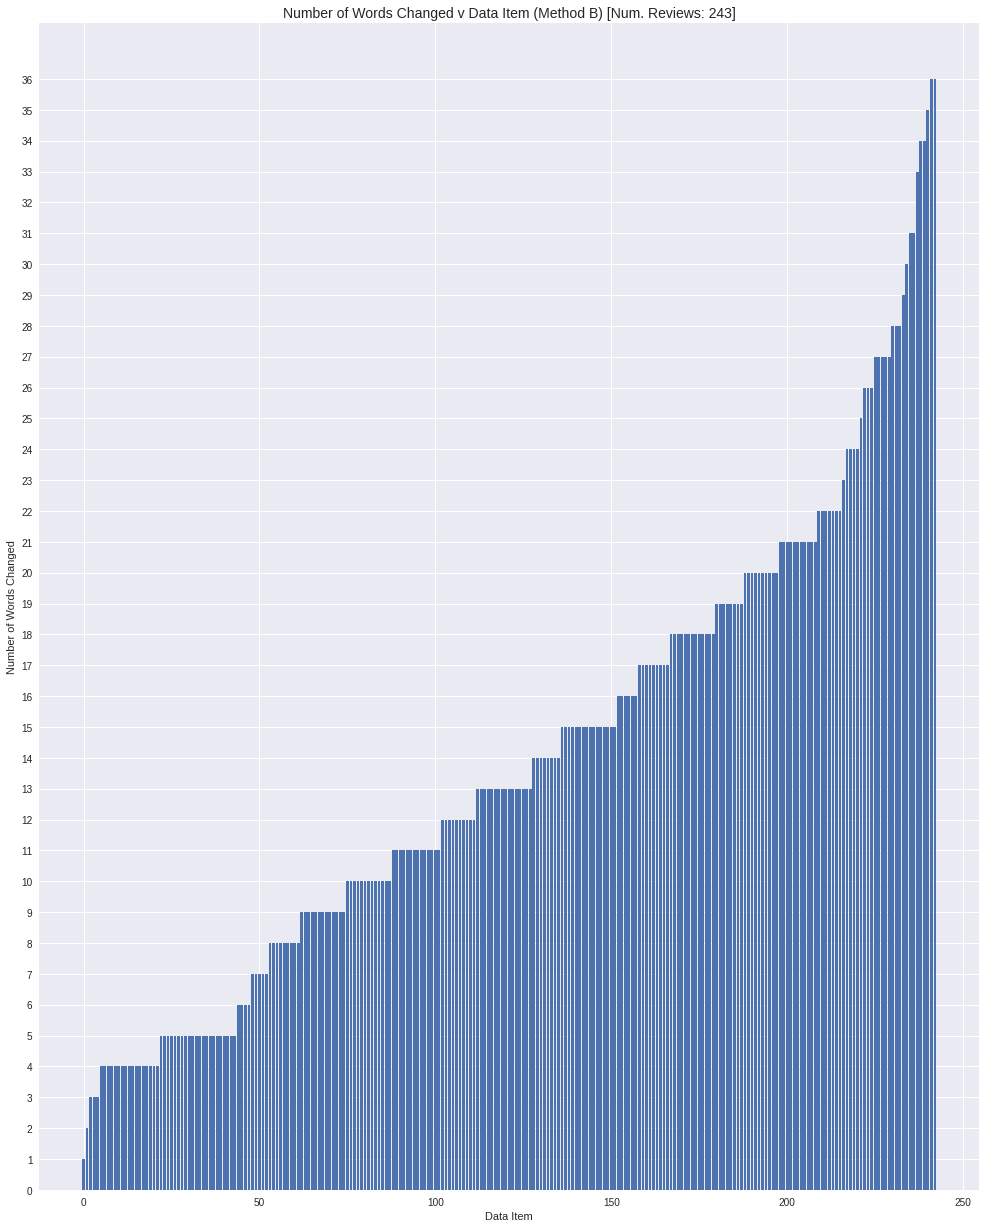

In [413]:

#bert_num_words_changed = bert_stats['ga_num_changes']

bert_num_words_changed = []

for i in range(dataset_size):
    if (bert_stats.at[i,'sentiment'] != bert_stats.at[i,'ga_sentiment']) and bert_stats.at[i,'ga_percent_change'] < 0.2:
        bert_num_words_changed.append(bert_stats.at[i,'ga_num_changes'])

bert_num_words_changed.sort()

bar_chart_filename_b = 'ga_attack_results/bar_chart_method_b.png'
graph_title_b = "Number of Words Changed v Data Item (Method B) [Num. Reviews: "+str(len(bert_num_words_changed))+"]"


words_generations_barchart(bert_num_words_changed, graph_title_b, bar_chart_filename_b)

# words changed v data item bar chart - Method C

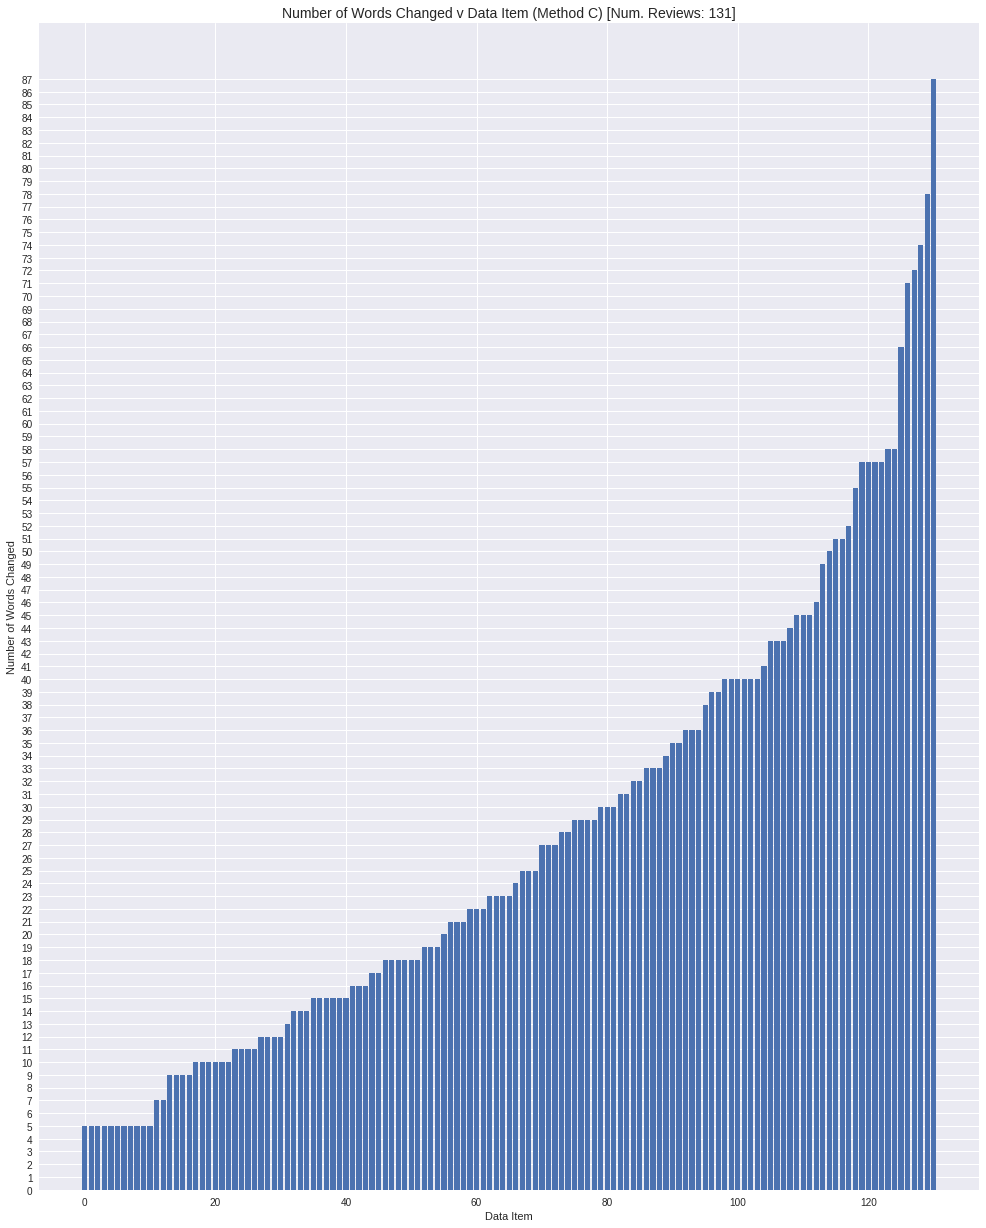

In [412]:

bert_distance_num_words_changed = []

for i in range(dataset_size):
    if (bert_distance_stats.at[i,'sentiment'] != bert_distance_stats.at[i,'ga_sentiment']) and bert_distance_stats.at[i,'ga_percent_change'] < 0.2:
        bert_distance_num_words_changed.append(bert_distance_stats.at[i,'ga_num_changes'])

bert_distance_num_words_changed.sort()


bar_chart_filename_c = 'ga_attack_results/bar_chart_method_c.png'
graph_title_c = "Number of Words Changed v Data Item (Method C) [Num. Reviews: "+str(len(bert_distance_num_words_changed))+"]"

words_generations_barchart(bert_distance_num_words_changed, graph_title_c, bar_chart_filename_c)

# Method A summary

In [234]:

set_percentage_modified(distance_stats)


Avg. num of words changed changes made:  16
Avg. percentage modified:  9.0 %


# Method B summary

In [235]:

set_percentage_modified(bert_stats)


Avg. num of words changed changes made:  14
Avg. percentage modified:  8.0 %


# Method C summary

In [237]:

set_percentage_modified(bert_distance_stats)


Avg. num of words changed changes made:  35
Avg. percentage modified:  18.0 %


# creat lists from above summaries

In [238]:
num_words_changed = [16,14,35]
percentage_changed = [9.0,8.0,18.0]
chart_labels = ["Method A", "Mathod B", "Method C"]

# bar chart for average words swapped for each method

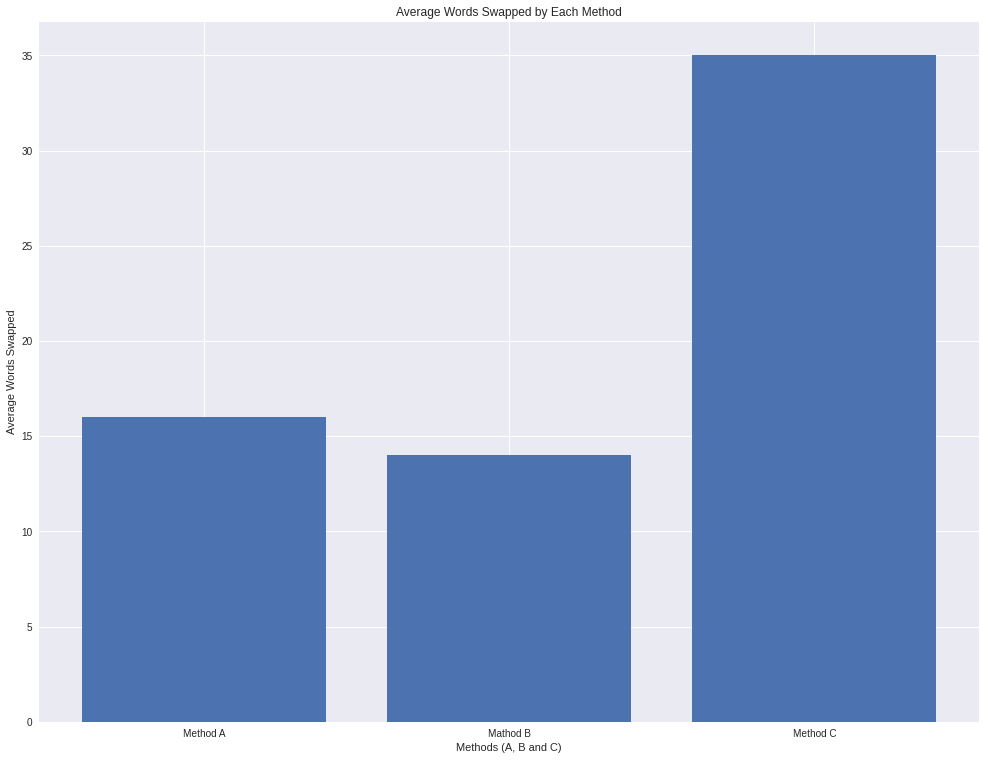

In [247]:

x_axis_name = 'Methods (A, B and C)'
y_axis_name = 'Average Words Swapped'
avg_bar_title = 'Average Words Swapped by Each Method'
file_name_avg_words_swapped = 'ga_attack_results/bar_chart_avg_words_changed.png'
average_stats_bar_chart(num_words_changed, chart_labels, x_axis_name, y_axis_name, avg_bar_title, file_name_avg_words_swapped)



# bar chart for average percentage change for all reviews

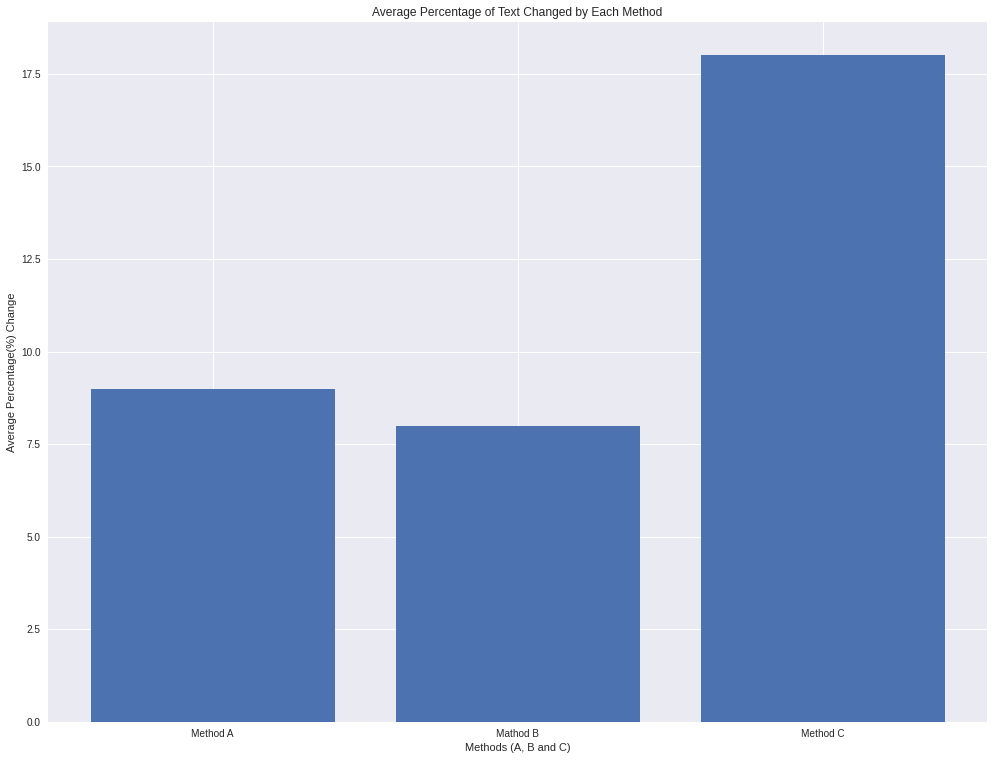

In [248]:

x_axis_name = 'Methods (A, B and C)'
y_axis_name = 'Average Percentage(%) Change'
avg_bar_title = 'Average Percentage of Text Changed by Each Method'
file_name_avg_words_swapped = 'ga_attack_results/bar_chart_avg_percentage_changed.png'
average_stats_bar_chart(percentage_changed, chart_labels, x_axis_name, y_axis_name, avg_bar_title, file_name_avg_words_swapped)


# match indexes of data sample to raw data set

In [254]:

# distance_stats
# bert_stats
# bert_distance_stats
# these should all be the same values - but to make sure we generate all of them and check
index_values_method_A = matching_indexes(distance_stats,normalized_dataset)
index_values_method_B = matching_indexes(bert_stats,normalized_dataset)
index_values_method_C = matching_indexes(bert_distance_stats,normalized_dataset)


In [264]:
print(index_values_method_A)

[42497, 47656, 27691, 5, 48736, 6408, 37435, 32752, 41844, 9491, 19940, 37731, 17343, 7291, 44252, 43838, 45796, 16987, 431, 34684, 18507, 11760, 40433, 10740, 14220, 10551, 46803, 17102, 20040, 46297, 14532, 30696, 32756, 10867, 38335, 25832, 38021, 40511, 42958, 3572, 19237, 11213, 3697, 42863, 48914, 14883, 25740, 7744, 9762, 46436, 3813, 24925, 45108, 46288, 26409, 44155, 15568, 45978, 21670, 38793, 41861, 7764, 35827, 22585, 3723, 34784, 16418, 39053, 27991, 41877, 28272, 36993, 26831, 40810, 7411, 46218, 3360, 12162, 11151, 25764, 10156, 48566, 42735, 42509, 2027, 31772, 20008, 17808, 45973, 36027, 42063, 24105, 32007, 16252, 38179, 44095, 3880, 23377, 29581, 29312, 38306, 14697, 20081, 31526, 21145, 13555, 33459, 19286, 26741, 716, 49820, 5765, 26734, 27897, 42292, 37084, 4369, 49144, 13028, 44059, 8553, 6906, 30805, 19612, 4307, 43153, 4329, 1059, 4536, 14037, 5524, 48334, 20194, 26852, 46102, 3584, 47358, 48028, 41479, 18653, 25920, 39594, 28546, 27092, 19560, 10377, 11651, 42

## check all the indexes in the lists generated are the same

In [260]:
if index_values_method_A == index_values_method_B == index_values_method_C:
    print("Equal")

Equal


## randomly select 2 items form the list and we will compare the same values for each method (A, B and C)

In [303]:
import random

item_one, item_two = random.sample(index_values_method_A, 2)
index_one = 0
index_two = 0

# get the index value for the randomly selected items
for i in range(len(index_values_method_A)):
    if index_values_method_A[i] == item_one:
        index_one = i
    if index_values_method_A[i] == item_two:
        index_two = i

## print first data item selected for method A

In [304]:

print_data_item(raw_dataset,normalized_dataset, distance_stats, index_one, item_one)


As the superb `Prime Suspect' series reaches part four there is no loss of momentum at all, this in itself a considerable achievement.' Prime Suspect IV: The Lost Child' has the solid supporting cast that we take for granted in these British dramas but of course the beautiful Helen Mirren easily dominates; our eyes never leave her while she's on-screen.<br /><br />The search for the lost child of the title leads Superintendent Jane Tennison's CID team to a prime suspect who turns out to be a convicted pedophile now living with a single mother and her two young daughters. The insight we are given into the workings of his mind is one of the emotional highlights of this mini-series but it may be too strong for many stomachs.<br /><br />The action sequences are brilliantly handled with the hand-held camera thrusting us right into the middle of the excitement and there's gripping tension during the climactic siege.<br /><br />Altogether this is another magnificent police procedural drama.



## print first data item selected for method B

In [305]:
print_data_item(raw_dataset,normalized_dataset, bert_stats, index_one, item_one)

As the superb `Prime Suspect' series reaches part four there is no loss of momentum at all, this in itself a considerable achievement.' Prime Suspect IV: The Lost Child' has the solid supporting cast that we take for granted in these British dramas but of course the beautiful Helen Mirren easily dominates; our eyes never leave her while she's on-screen.<br /><br />The search for the lost child of the title leads Superintendent Jane Tennison's CID team to a prime suspect who turns out to be a convicted pedophile now living with a single mother and her two young daughters. The insight we are given into the workings of his mind is one of the emotional highlights of this mini-series but it may be too strong for many stomachs.<br /><br />The action sequences are brilliantly handled with the hand-held camera thrusting us right into the middle of the excitement and there's gripping tension during the climactic siege.<br /><br />Altogether this is another magnificent police procedural drama.



## print first data item selected for method C

In [306]:
print_data_item(raw_dataset,normalized_dataset, bert_distance_stats,  index_one, item_one)

As the superb `Prime Suspect' series reaches part four there is no loss of momentum at all, this in itself a considerable achievement.' Prime Suspect IV: The Lost Child' has the solid supporting cast that we take for granted in these British dramas but of course the beautiful Helen Mirren easily dominates; our eyes never leave her while she's on-screen.<br /><br />The search for the lost child of the title leads Superintendent Jane Tennison's CID team to a prime suspect who turns out to be a convicted pedophile now living with a single mother and her two young daughters. The insight we are given into the workings of his mind is one of the emotional highlights of this mini-series but it may be too strong for many stomachs.<br /><br />The action sequences are brilliantly handled with the hand-held camera thrusting us right into the middle of the excitement and there's gripping tension during the climactic siege.<br /><br />Altogether this is another magnificent police procedural drama.



## print second data item selected for method A

In [307]:
print_data_item(raw_dataset,normalized_dataset, distance_stats,  index_two, item_two)

There's some very clever humour in this film, which is both a parody of and a tribute to actors. However, after a while it just seems an exercise in style (notwithstanding great gags such as Balasko continuing the part of Dussolier, and very good acting by all involved) and I was wondering why Blier made this film. All is revealed in the ending, when Blier, directing Claude Brasseur, gets a phone call from his dad (Bernard Blier) - from heaven, and gets the chance to say how much he misses him. An effective emotional capper and obviously heartfelt. But there isn't really sufficient dramatic tension or emotional involvement to keep the rest of the film interesting throughout it's entire running time. Some really nice scenes and sequences, however, and anyone who likes these 'mosntres sacrés' of the French cinema should get a fair amount of enjoyment out of this film.


there's some very clever humour in this film  which is both a parody of and a tribute to actors  however  after a while

## print second data item selected for method B

In [308]:
print_data_item(raw_dataset,normalized_dataset, bert_stats, index_two, item_two)

There's some very clever humour in this film, which is both a parody of and a tribute to actors. However, after a while it just seems an exercise in style (notwithstanding great gags such as Balasko continuing the part of Dussolier, and very good acting by all involved) and I was wondering why Blier made this film. All is revealed in the ending, when Blier, directing Claude Brasseur, gets a phone call from his dad (Bernard Blier) - from heaven, and gets the chance to say how much he misses him. An effective emotional capper and obviously heartfelt. But there isn't really sufficient dramatic tension or emotional involvement to keep the rest of the film interesting throughout it's entire running time. Some really nice scenes and sequences, however, and anyone who likes these 'mosntres sacrés' of the French cinema should get a fair amount of enjoyment out of this film.


there's some very clever humour in this film  which is both a parody of and a tribute to actors  however  after a while

## print second data item selected for method C

In [309]:
print_data_item(raw_dataset,normalized_dataset, bert_distance_stats,  index_two, item_two)

There's some very clever humour in this film, which is both a parody of and a tribute to actors. However, after a while it just seems an exercise in style (notwithstanding great gags such as Balasko continuing the part of Dussolier, and very good acting by all involved) and I was wondering why Blier made this film. All is revealed in the ending, when Blier, directing Claude Brasseur, gets a phone call from his dad (Bernard Blier) - from heaven, and gets the chance to say how much he misses him. An effective emotional capper and obviously heartfelt. But there isn't really sufficient dramatic tension or emotional involvement to keep the rest of the film interesting throughout it's entire running time. Some really nice scenes and sequences, however, and anyone who likes these 'mosntres sacrés' of the French cinema should get a fair amount of enjoyment out of this film.


there's some very clever humour in this film  which is both a parody of and a tribute to actors  however  after a while

## get list of words swapped for first data item using method A

In [330]:
words_swapped(normalized_dataset, distance_stats,  index_one, item_one)

BEFORE:  prime  AFTER:  prima
BEFORE:  series  AFTER:  number
BEFORE:  part  AFTER:  parties
BEFORE:  four  AFTER:  oven
BEFORE:  loss  AFTER:  loosing
BEFORE:  prime  AFTER:  first
BEFORE:  iv  AFTER:  d
BEFORE:  course  AFTER:  courses
BEFORE:  beautiful  AFTER:  handsome
BEFORE:  helen  AFTER:  jolene
BEFORE:  eyes  AFTER:  eyeballs
BEFORE:  superintendent  AFTER:  headmaster
BEFORE:  team  AFTER:  machine
BEFORE:  pedophile  AFTER:  pedophilia
BEFORE:  two  AFTER:  trois
BEFORE:  daughters  AFTER:  female
BEFORE:  one  AFTER:  somebody
BEFORE:  highlights  AFTER:  emphasize
BEFORE:  sequences  AFTER:  sequencing
BEFORE:  brilliantly  AFTER:  magnificently
BEFORE:  handled  AFTER:  processed
BEFORE:  camera  AFTER:  cameras
BEFORE:  excitement  AFTER:  agitation
BEFORE:  tension  AFTER:  voltage
BEFORE:  magnificent  AFTER:  marvellous

Total number of words swapped:  25
Sentiment was changed for this data item
Probability Before:  0.9986020922660828
Probability After:  0.3767103850

## get list of words swapped for first data item using method B

In [332]:
words_swapped(normalized_dataset, bert_stats,  index_one, item_one)

BEFORE:  series  AFTER:  night
BEFORE:  four  AFTER:  ii
BEFORE:  '  AFTER:  of
BEFORE:  prime  AFTER:  s
BEFORE:  solid  AFTER:  biggest
BEFORE:  supporting  AFTER:  acting
BEFORE:  granted  AFTER:  free
BEFORE:  british  AFTER:  holy
BEFORE:  dramas  AFTER:  isles
BEFORE:  easily  AFTER:  now
BEFORE:  never  AFTER:  not
BEFORE:  onscreen  AFTER:  running
BEFORE:  search  AFTER:  charity
BEFORE:  tennison's  AFTER:  to
BEFORE:  pedophile  AFTER:  adult
BEFORE:  mind  AFTER:  brain
BEFORE:  one  AFTER:  capable
BEFORE:  highlights  AFTER:  consequences
BEFORE:  may  AFTER:  would
BEFORE:  strong  AFTER:  hot
BEFORE:  brilliantly  AFTER:  generally
BEFORE:  handled  AFTER:  associated
BEFORE:  handheld  AFTER:  movie
BEFORE:  gripping  AFTER:  no
BEFORE:  tension  AFTER:  silence
BEFORE:  siege  AFTER:  stage

Total number of words swapped:  26
Sentiment was changed for this data item
Probability Before:  0.9986020922660828
Probability After:  0.35181382298469543


## get list of words swapped for first data item using method C

In [334]:
words_swapped(normalized_dataset, bert_distance_stats,  index_one, item_one)

BEFORE:  prime  AFTER:  prima
BEFORE:  series  AFTER:  instalment
BEFORE:  reaches  AFTER:  obtains
BEFORE:  part  AFTER:  parties
BEFORE:  loss  AFTER:  loosing
BEFORE:  momentum  AFTER:  dynamic
BEFORE:  considerable  AFTER:  sizable
BEFORE:  achievement  AFTER:  successes
BEFORE:  prime  AFTER:  first
BEFORE:  lost  AFTER:  outof
BEFORE:  cast  AFTER:  thrown
BEFORE:  take  AFTER:  picked
BEFORE:  dramas  AFTER:  opera
BEFORE:  course  AFTER:  paths
BEFORE:  helen  AFTER:  jolene
BEFORE:  easily  AFTER:  easy
BEFORE:  eyes  AFTER:  eyelids
BEFORE:  never  AFTER:  not
BEFORE:  leave  AFTER:  letting
BEFORE:  onscreen  AFTER:  internet
BEFORE:  search  AFTER:  searches
BEFORE:  lost  AFTER:  outof
BEFORE:  child  AFTER:  infantile
BEFORE:  title  AFTER:  designation
BEFORE:  leads  AFTER:  directors
BEFORE:  superintendent  AFTER:  governing
BEFORE:  team  AFTER:  machine
BEFORE:  prime  AFTER:  first
BEFORE:  turns  AFTER:  rotates
BEFORE:  pedophile  AFTER:  perverts
BEFORE:  single

## get list of words swapped for second data item using method A

In [335]:
words_swapped(normalized_dataset, distance_stats,  index_two, item_two)

BEFORE:  humour  AFTER:  mood
BEFORE:  parody  AFTER:  travesty
BEFORE:  actors  AFTER:  agents
BEFORE:  great  AFTER:  grand
BEFORE:  gags  AFTER:  jaws
BEFORE:  part  AFTER:  parties
BEFORE:  good  AFTER:  alright
BEFORE:  acting  AFTER:  behaving
BEFORE:  ending  AFTER:  ceases
BEFORE:  bernard  AFTER:  barnard
BEFORE:  emotional  AFTER:  sentimental
BEFORE:  tension  AFTER:  voltage
BEFORE:  throughout  AFTER:  during
BEFORE:  running  AFTER:  run
BEFORE:  nice  AFTER:  handsome
BEFORE:  scenes  AFTER:  image
BEFORE:  amount  AFTER:  amounts

Total number of words swapped:  17
Sentiment was changed for this data item
Probability Before:  0.9913209080696106
Probability After:  0.393478661775589


## get list of words swapped for second data item using method B

In [336]:
words_swapped(normalized_dataset, bert_stats,  index_two, item_two)

BEFORE:  clever  AFTER:  bad
BEFORE:  film  AFTER:  book
BEFORE:  parody  AFTER:  member
BEFORE:  great  AFTER:  some
BEFORE:  claude  AFTER:  la
BEFORE:  emotional  AFTER:  show
BEFORE:  heartfelt  AFTER:  not
BEFORE:  sufficient  AFTER:  no
BEFORE:  really  AFTER:  rather
BEFORE:  however  AFTER:  anything
BEFORE:  get  AFTER:  make
BEFORE:  fair  AFTER:  reasonable

Total number of words swapped:  12
Sentiment was changed for this data item
Probability Before:  0.9913209080696106
Probability After:  0.38834109902381897


## get list of words swapped for second data item using method C

In [337]:
words_swapped(normalized_dataset, bert_distance_stats,  index_two, item_two)

BEFORE:  clever  AFTER:  smart
BEFORE:  humour  AFTER:  mood
BEFORE:  tribute  AFTER:  compliments
BEFORE:  actors  AFTER:  actresses
BEFORE:  seems  AFTER:  occurs
BEFORE:  exercise  AFTER:  exercising
BEFORE:  notwithstanding  AFTER:  although
BEFORE:  gags  AFTER:  jaws
BEFORE:  good  AFTER:  ok
BEFORE:  acting  AFTER:  behaving
BEFORE:  wondering  AFTER:  asks
BEFORE:  film  AFTER:  films
BEFORE:  revealed  AFTER:  disclosed
BEFORE:  phone  AFTER:  telephones
BEFORE:  dad  AFTER:  pappy
BEFORE:  bernard  AFTER:  barnard
BEFORE:  chance  AFTER:  chances
BEFORE:  say  AFTER:  says
BEFORE:  misses  AFTER:  lack
BEFORE:  effective  AFTER:  efficient
BEFORE:  capper  AFTER:  evilness
BEFORE:  obviously  AFTER:  clearly
BEFORE:  heartfelt  AFTER:  candid
BEFORE:  really  AFTER:  frankly
BEFORE:  sufficient  AFTER:  suffice
BEFORE:  dramatic  AFTER:  whopping
BEFORE:  tension  AFTER:  pressure
BEFORE:  emotional  AFTER:  thrills
BEFORE:  involvement  AFTER:  involved
BEFORE:  rest  AFTER:

In [346]:
print("Method A")
sentiment_change_percentage(distance_stats)
print("Method B")
sentiment_change_percentage(bert_stats)
print("Method C")
sentiment_change_percentage(bert_distance_stats)

Method A
Percentage of reviews where sentiment was changed after attack: 95.2 % changed sentiment. i.e. 238  out of  250
Percentage of reviews failed to change sentiment:  4.8 % did not change, i.e. 12  out of  250


Method B
Percentage of reviews where sentiment was changed after attack: 98.4 % changed sentiment. i.e. 246  out of  250
Percentage of reviews failed to change sentiment:  1.6 % did not change, i.e. 4  out of  250


Method C
Percentage of reviews where sentiment was changed after attack: 55.2 % changed sentiment. i.e. 138  out of  250
Percentage of reviews failed to change sentiment:  44.8 % did not change, i.e. 112  out of  250




In [453]:
# even if the sentiment has been changed we still count it as failed if the percentage change is greater than 20% (i.e > 0.20)

# distance_stats
# bert_stats
# bert_distance_stats


# for i in range(len(distance_stats)):
#     if distance_stats.at[i,'ga_percent_change'] > 0.20:
#         print(distance_stats.at[i,'ga_percent_change'])
        
# for i in range(len(bert_stats)):
#     if bert_stats.at[i,'ga_percent_change'] > 0.20:
#         print(bert_stats.at[i,'ga_percent_change'])

# for i in range(len(bert_distance_stats)):
#     if bert_distance_stats.at[i,'ga_percent_change'] > 0.20:
#         print(bert_distance_stats.at[i,'ga_percent_change'])

print(distance_num_words_changed)

[2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 27, 27, 27, 27, 27, 27, 29, 29, 30, 30, 31, 31, 31, 32, 33, 33, 34, 34, 35, 39, 39, 43, 44, 44, 44]


## percentage success and mean words swapped percentage stats

In [472]:

# Method A
distance_num_words_changed = []
distance_length_of_text = []

for i in range(dataset_size):
    if (distance_stats.at[i,'sentiment'] != distance_stats.at[i,'ga_sentiment']) and distance_stats.at[i,'ga_percent_change'] < 0.2:
        distance_num_words_changed.append(distance_stats.at[i,'ga_num_changes'])
        distance_length_of_text.append(len(distance_stats.at[i,'text'].split()))
        
# Method B
bert_num_words_changed = []
bert_length_of_text = []
for i in range(dataset_size):
    if (bert_stats.at[i,'sentiment'] != bert_stats.at[i,'ga_sentiment']) and bert_stats.at[i,'ga_percent_change'] < 0.2:
        bert_num_words_changed.append(bert_stats.at[i,'ga_num_changes'])
        bert_length_of_text.append(len(bert_stats.at[i,'text'].split()))
   
        
# Method C       
bert_distance_num_words_changed = []
bert_distance_length_of_text = []

for i in range(dataset_size):
    if (bert_distance_stats.at[i,'sentiment'] != bert_distance_stats.at[i,'ga_sentiment']) and bert_distance_stats.at[i,'ga_percent_change'] < 0.2:
        bert_distance_num_words_changed.append(bert_distance_stats.at[i,'ga_num_changes'])
        bert_distance_length_of_text.append(len(bert_distance_stats.at[i,'text'].split()))


In [474]:
from statistics import mean, median, mode, stdev

print("Method A:\nSuccess (%): ", (len(distance_num_words_changed)/ dataset_size) * 100 ,  
      (mean(distance_num_words_changed) / mean(distance_length_of_text)) * 100, "\n")

print("Method B:\nSuccess (%): ", (len(bert_num_words_changed)/ dataset_size) * 100 ,  
      (mean(bert_num_words_changed) / mean(bert_length_of_text)) * 100, "\n")

print("Method C:\nSuccess (%): ", (len(bert_distance_num_words_changed)/ dataset_size) * 100 ,  
      (mean(bert_distance_num_words_changed) / mean(bert_distance_length_of_text)) * 100, "\n")


Method A:
Success (%):  94.0 6.550408529468128 

Method B:
Success (%):  97.2 5.423175965665236 

Method C:
Success (%):  52.400000000000006 9.43929972512076 

